<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S7_1_Introduction_Tensorflow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction à Tensorflow 2.0 

## Ce que vous apprendrez dans ce cours 

TF 2.0 est une vraie avancée dans le monde du Deep Learning chez Google. Alors que leur première version était difficile à manipuler du fait de devoir créer des sessions, Tensorflow 2.0 est fondé, comme Pytorch, sur le principe d'Eager Execution. Ceci veut dire que les opérations que vous effectuées sur vos données sont instantanément éxecutées. 

Le second avantage de la librairie est que Tensorflow 2.0 intègre Keras, une librairie qui facilite la création de modèles de Deep Learning. Ce qui facilite largement la vie des développeurs Deep Learning. 

Ce cours vise donc à vous montrer rapidement les avancées entre Tensorflow 1.X et Tensorflow 2.0. Nous verrons ensuite les grands principes de manipulations de tenseurs et comment créer un réseau de neurones simple avec Keras. 

## TF 1.X VS TF 2.0 



### Static Graphs VS Eager Execution 

Pour comprendre rapidement pourquoi Tensorflow 2.0 est vraiment une belle avancée dans le Deep Learning, il est bon de regarder la différence entre les deux versions. Regardons d'abord le principe de TF 1.X 

In [0]:
!pip install tensorflow-gpu==1.14

In [0]:
import tensorflow as tf 
tf.__version__

'1.14.0'

In [0]:
# Créons une variable en TF 1.X 

t = tf.Variable([
    [1,2],
    [3,4]
])

print(t)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32_ref>


On peut voir ici que nous ne pouvons pas accéder aux valeurs de notre variables. Essayons de faire une opération 

In [0]:
addition = t + 2
addition

<tf.Tensor 'add:0' shape=(2, 2) dtype=int32>

Pour pouvoir effectuer des opérations et accéder aux valeurs du tenseurs, il faut créer ce qu'on appelle une _session_ 

In [0]:
# Création d'une session
session = tf.Session()

# Initialisation des variables
session.run(tf.global_variables_initializer())

In [0]:
# Opération
session.run(addition)

array([[3, 4],
       [5, 6]], dtype=int32)

Ce principe de session vient de ce que s'appelle des _graphs_. Tensorflow stocke une opération dans un _static graph_ qui sera éxecuté uniquement si vous ouvrez une session. 

Cette façon de faire était complètement contre-intuitive et beaucoup d'utilisateurs se cassaient les dents là dessus mais, cette ère est maintenant révolue depuis l'arrivée de Tensorflow 2.0 

Regardons maintenant la différence : 

In [0]:
!pip install tensorflow-gpu==2.0.0beta1

     |████████████████████████████████| 348.9MB 50kB/s 
     |████████████████████████████████| 501kB 49.9MB/s 
     |████████████████████████████████| 3.1MB 49.9MB/s 


In [0]:
import tensorflow as tf
tf.__version__

'2.0.0-beta1'

In [0]:
t = tf.Variable([
    [1,2],
    [3,4]
])

print(t)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>


Vous pouvez voir tout de suite que vous avez directement accès aux valeurs de votre tenseurs. Regardons quelques opérations :

In [0]:
# Addition d'un nombre scalaire
t + 5

<tf.Tensor: id=12, shape=(2, 2), dtype=int32, numpy=
array([[6, 7],
       [8, 9]], dtype=int32)>

In [0]:
# Ajouter un vecteur
t + [[1,2]]

<tf.Tensor: id=16, shape=(2, 2), dtype=int32, numpy=
array([[2, 4],
       [4, 6]], dtype=int32)>

In [0]:
# Addition d'un autre tenseurs
t.assign_add([
    [1,2],
    [4,6]
])

t

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[ 2,  4],
       [ 7, 10]], dtype=int32)>

Ceci est ce qu'on appelle l' _Eager Execution_. Vous pouvez directement accéder et manipuler vos tenseurs comme s'ils étaient des numpy arrays ! 

Vous n'aurez pas besoin de faire beaucoup d'opérations directes sur des tenseurs puisque votre réseau de neurones s'occupera de cela pour vous. Voyons donc comment créer nos architectures de réseaux _from scratch_

## Créer un réseau de neurones avec Keras 

Bien que nous nous baserons le plus souvent sur des principes de _transfer learning_, il est bon de comprendre comment créer une architecture de réseau car vous aurez besoin de comprendre comment celles-ci se construisent avant de pouvoir vous appuyer sur des réseaux pré-entrainés. Voyons donc comment cela fonctionne. 

### Chargement & Preprocessing des données 

Pour la démonstration, nous allons charger le dataset [cifar10](https://www.cs.toronto.edu/~kriz/cifar.html). Ce dataset contient 10 classes d'objets que nous allons essayer de classer via un CNN. 

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(X_train, y_train),(X_test, y_test) = cifar10.load_data()

Visualisons une image au hasard du dataset.

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[6]')

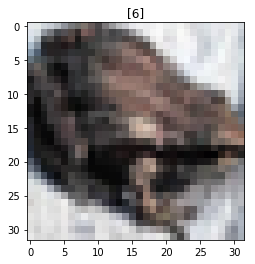

In [0]:
# Visualisation d'une image aléatoire
import matplotlib.pyplot as plt 
import numpy as np

random_image = np.random.randint(100)
plt.imshow(X_train[random_image])
plt.title(y_train[random_image])

Si vous regardez _y_, nous n'avons que des numéros d'index. Essayons de voir ce que contient chacune des classes via une fonction qui va nous retourner une image aléatoire de chacune des classes de notre variable cible.

In [0]:
def visualize_random_img_for_each_target(X ,y, nrows, ncols):
  
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)
  
  random_image = np.random.randint(100)
  
  index = nrows + ncols
  for row in range(nrows):
    for col in range(ncols):
      mask = y == nrows + ncols - index
      mask = mask.squeeze()
      axes[row, col].imshow(X[mask][random_image])
      index -=1 


  print("index for each image :{}".format(np.unique(y)))

index for each image :[0 1 2 3 4 5 6 7 8 9]


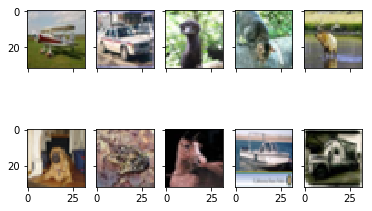

In [0]:
visualize_random_img_for_each_target(X_train,y_train, 2, 5)

Même si les images sont de relativement basse qualité, on peut distinguer les classes suivantes : 

In [0]:
# Noms des variables cibles
class_names = ['airplane', 
               'automobile', 
               'bird', 
               'cat', 
               'deer', 
               'dog', 
               'frog', 
               'horse', 
               'ship', 
               'truck']

### Data Augmentation

Un moyen d'améliorer nos résultats est de faire ce qu'on appelle de la _data augmentation_. Ce principe consiste à changer les images de notre dataset de manière aléatoire. Ceci a pour but que l'algorithme voit toujours des images différentes, on évite ainsi _l'overfitting_. 

Il y a une classe très pratique pour cela qui est [_ImageDataGenerator_](https://keras.io/preprocessing/image/) dans Keras 

In [0]:
data_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    data_format="channels_last"
)

Ici : 
`rescale`: Permet de diviser chacun des éléments de notre tenseurs par 255, cela permet aux modèle d'apprendre plus facilement sur des images définies en RGB 

`horizontal_flip`: Permet d'inverser une image par l'horizontal (comme si vous la regardiez dans un mirroir)

`shear_range`: est une manière d'étirer l'image

`zoom_range`: permet de zoomer sur une partie aléatoire de l'image 

`data_format`: permet de dire quel _shape_ notre image va avoir en output. Ici, nous voulons : (Sample, height, width, channels) où (taille de l'échantillon, hauteur, largeur, couleurs)

In [0]:
data_aug.fit(X_train)

Prenons, une image pour voir si tout s'est bien passé dans notre _data augmentation_

In [0]:
next(iter(data_aug.flow(X_train, y_train, batch_size=1)))[0].shape

(1, 32, 32, 3)

In [0]:
img, target = next(iter(data_aug.flow(X_train, y_train, batch_size=1)))

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[[9]]')

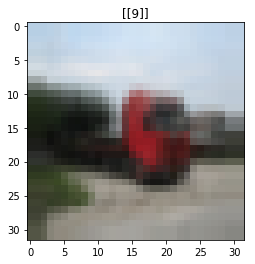

In [0]:
plt.imshow(img.reshape(32,32,3))
plt.title(target)

On peut voir que nous avons bien l'image d'un camion. Tout à l'air bon pour passer à la suite des événements : La création d'une architecture. 

## Création d'un modèle CNN

Pour créer une architecture from scratch dans Keras, vous aurez besoin de la classe `Sequential()` et de `layers`, rien de plus ! 

Voyons ensemble comment nous pourrions créer un réseau de neurones convolutionnel simple. Pour cela, nous allons arbitrairement choisir la structure suivante : 

* 1ère couche : Première feature map 2D de taille 3x3
* 2e couche : Un MaxPool 2D qui va nous permettre de tirer les pixels les plus signifiants de notre feature map

* 3e - 6e couche : Nous allons répéter le processus 2 fois 
* 7e couche : Nous allons commencer à repasser ceci dans un réseau de neurones classique, nous allons donc devoir applatir (Flatten) nos tenseurs 
* 8e couche : Nous créons une première couche connectée classique 
* 9e couche : Nous ajoutons ce qu'on appelle du _Dropout_ pour éviter du sur-entrainement
* 10e couche : Nous repassons sur une nouvelle couche cachée plus mince que celle d'au dessus 
* 11e couche : Celle-ci sera notre dernière, elle aura donc autant d'output que de classes dans notre variable cible 

Voici donc ce que cela donne sur Tensorflow 

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=64, activation ="relu"),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

Nous pouvons regarder la tête de notre modèle via `model.summary`

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)             

### Insertion d'une loss function et d'un optimiseur

Une fois que nous avons créé notre architecture, nous avons besoin de déterminer une fonction de coût ainsi qu'un optimiseur. Ceci va se passer en deux étapes : 

* **1ere étape** : Nous allons définir une `Learning Rate Schedule`. Ce qui va nous permettre de déterminer un learning rate dynamique qui va décroître au fur et à mesure que l'algorithme s'entraîne. 

* **2e étape** : Nous allons ensuite compiler cela dans notre modèle en précisant notre fonction de coût et notre metric. 

In [0]:
initial_learning_rate = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)


Ici, nous avons définit un `ExponentialDecay` qui va simplement appliquer la fonction suivante au learning rate inital que nous fixons : 

`initial_learning_rate * decay_rate ^ (step / decay_steps)`

Dans l'exemple du dessus, toutes les 10000 images passées, nous appliquons la fonction du dessus. Si vous souhaitez en savoir plus sur les différents types de `schedule` n'hésitez pas à regarder cette page :

[Keras Optimizers Schedules](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules)

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= tf.keras.optimizers.Adam(learning_rate = lr_schedule), 
              metrics=["sparse_categorical_accuracy"])

Pour cette dernière partie, nous rassemblons notre :

* fonction de coût
* Optimiseur 
* Metric 

En l'occurence, lorsque nous faisons de la classification non-binaire, nous choisissons presque toujours `sparse_categorical_crossentropy`. Bien sûr, si nous choisissons cette fonction de coût, nous avons la metric `sparse_categorical_accuracy` qui va avec. 

### Entrainement 

La dernière étape de notre projet est d'entrainer le modèle. Lorsque nous faisons de la _data augmentation_, vous aurez besoin d'appeler la fonction : `fit_generator`

Cependant, si vous n'utilisez pas de _data augmentation_, vous avez simplement la fonction `fit` qui marche très bien. 

Nous allons donc faire tourner le modèle avec batch_size de 1. C'est à dire que nous prendrons les images à l'entrainement, une par une. 

FYI : Vous aurez aux alentours de **1 heure** d'entrainement sur GPU. 

In [0]:
model.fit_generator(data_aug.flow(X_train, y_train, batch_size=1), 
                    steps_per_epoch=len(X_train)//1,
                    epochs=10)

Epoch 1/10
50000/50000 [==============================] - 293s 6ms/step - loss: 0.9999 - sparse_categorical_accuracy: 0.6508
Epoch 2/10
50000/50000 [==============================] - 293s 6ms/step - loss: 0.9772 - sparse_categorical_accuracy: 0.6607
Epoch 3/10
50000/50000 [==============================] - 294s 6ms/step - loss: 0.9653 - sparse_categorical_accuracy: 0.6607
Epoch 4/10
50000/50000 [==============================] - 294s 6ms/step - loss: 0.9540 - sparse_categorical_accuracy: 0.6660
Epoch 5/10
50000/50000 [==============================] - 293s 6ms/step - loss: 0.9443 - sparse_categorical_accuracy: 0.6693
Epoch 6/10
50000/50000 [==============================] - 294s 6ms/step - loss: 0.9386 - sparse_categorical_accuracy: 0.6719
Epoch 7/10
50000/50000 [==============================] - 294s 6ms/step - loss: 0.9314 - sparse_categorical_accuracy: 0.6753
Epoch 8/10
50000/50000 [==============================] - 294s 6ms/step - loss: 0.9269 - sparse_categorical_accuracy: 0.6754


Après 10 epochs, nous arrivons à presque 68% d'accuracy sur les données d'entrainement, ce qui est pas mal étant donné que nous avons assez peu de données, une structure relativement simple. Voyons cependant ce que cela donne sur des donnés de validation.

Pour cela, nous avons la méthode : `evaluate_generator` qui va pouvoir nous retourner un tuple (validation_loss, accuracy). Nous allons donc pouvoir évaluer la performance de notre modèle. 

In [0]:
loss, accuracy = model.evaluate_generator(data_aug.flow(X_test, y_test, batch_size=1))

FYI : De la même que pour `fit_generator`, vous avez l'équivalent `fit` pour des données _non augmentées_, vous avez la même chose pour `evaluate_generator` et `evaluate`.

In [0]:
print("valid loss = {}".format(loss))
print("Accuracy = {}%".format(np.round(accuracy*100, 2)))

valid loss = 0.9510624564636401
Accuracy = 67.55%


Nous avons une accuracy de 67.5% sur les données de validation, le modèle a l'air d'avoir bien généralisé. Ceci est donc une bonne nouvelle, d'autant plus que notre `valid loss` est à peu près au même niveau que notre `train loss`. Nous pourrions donc continuer d'entrainer le modèle. 

Regardons cependant une prédiction de notre modèle sur une image de `X_test`

In [0]:
pred = np.argmax(model.predict(X_test[0].reshape(1,32,32,3)))

`model.predict` nous retourne une liste de probabilités pour une chacune des classes de `y`. Pour nous retourner seulement l'index où nous avons la plus haute probabilité, nous prenons la méthode `argmax` de `numpy`. 

Comparons maintenant la prédiction de notre modèle par rapport à la réalité 

Text(0.5, 1.0, 'True = [3] \n Pred = 3')

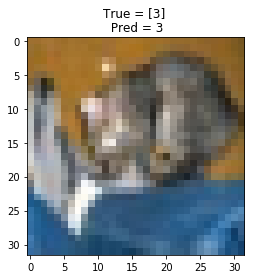

In [0]:
plt.imshow(X_test[0])
plt.title("True = {} \n Pred = {}".format(y_test[0], pred))

Bonne prédiction pour cette image ! 

## Ressources

* [Building Powerful Image Classification Models using very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

* [Optimizers Schedule](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules)

* [Load Cifar Data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)

* [Cifar Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)